In [91]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [92]:
# evalys requires pandas==0.25.3
# %matplotlib inline
from pandas import read_csv
import matplotlib
from evalys.jobset import JobSet

In [93]:
# input_location = 'KTH-1000-gauss/backfill-1'
input_location = 'out'

In [94]:
schedule = read_csv('../output/' + input_location + '_schedule.csv')
schedule.T

,0
batsim_version,3.1.0
consumed_joules,0
makespan,1.03458e+06
max_slowdown,97955.8
max_turnaround_time,415588
max_waiting_time,328757
mean_slowdown,2797.66
mean_turnaround_time,78348.5
mean_waiting_time,74053.9
nb_computing_machines,109


In [95]:
js = JobSet.from_csv('../output/' + input_location + '_jobs.csv')
df = js.df.sort_values(by=['submission_time'])
df

,jobID,workload_name,profile,submission_time,requested_number_of_resources,requested_time,success,final_state,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,allocated_resources,consumed_energy,metadata,proc_alloc
65,15,w0,15,1.0,4,53940.0,1,COMPLETED_SUCCESSFULLY,1.0,3477.000300,3478.000300,0.0,3477.000300,1.0,"[0, 1, 2, 3]",-1.0,NaN,4
76,16,w0,16,173.0,25,3600.0,1,COMPLETED_SUCCESSFULLY,173.0,2488.000350,2661.000350,0.0,2488.000350,1.0,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...",-1.0,NaN,25
87,17,w0,17,627.0,5,215400.0,1,COMPLETED_SUCCESSFULLY,627.0,215337.000200,215964.000200,0.0,215337.000200,1.0,"[29, 30, 31, 32, 33]",-1.0,NaN,5
98,18,w0,18,987.0,17,36000.0,1,COMPLETED_SUCCESSFULLY,987.0,35373.000350,36360.000350,0.0,35373.000350,1.0,"[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 4...",-1.0,NaN,17
109,19,w0,19,4081.0,8,2400.0,1,COMPLETED_SUCCESSFULLY,4081.0,29.000350,4110.000350,0.0,29.000350,1.0,"[0, 1, 2, 3, 4, 5, 6, 7]",-1.0,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,1010,w0,1010,793416.0,2,300.0,1,COMPLETED_SUCCESSFULLY,793416.0,30.000250,793446.000250,0.0,30.000250,1.0,"[48, 65]",-1.0,NaN,2
13,1011,w0,1011,793697.0,1,2700.0,1,COMPLETED_SUCCESSFULLY,793697.0,2648.000000,796345.000000,0.0,2648.000000,1.0,[48],-1.0,NaN,1
14,1012,w0,1012,795458.0,4,600.0,1,COMPLETED_SUCCESSFULLY,795458.0,4.323632,795462.323632,0.0,4.323632,1.0,"[65, 67, 78, 79]",-1.0,NaN,4
15,1013,w0,1013,797601.0,1,21600.0,1,COMPLETED_SUCCESSFULLY,797601.0,18256.000000,815857.000000,0.0,18256.000000,1.0,[48],-1.0,NaN,1


In [96]:
js.df.describe()

,submission_time,requested_number_of_resources,requested_time,success,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,consumed_energy,metadata,proc_alloc
count,1000.000000,1000.000000,1000.000000,1000.00000,9.930000e+02,993.000000,9.930000e+02,993.000000,993.000000,993.000000,993.0,0.0,1000.000000
mean,331702.810000,10.440000,6729.300000,0.95800,4.044309e+05,4324.928577,4.087559e+05,74575.905685,78900.834262,2817.378778,-1.0,NaN,9.868000
std,225300.048046,15.457469,19764.430784,0.20069,2.663094e+05,17310.397550,2.686524e+05,81748.373542,85392.229440,8905.300549,0.0,NaN,14.273974
min,1.000000,1.000000,60.000000,0.00000,1.000000e+00,2.000000,2.661000e+03,0.000000,2.000000,1.000000,-1.0,NaN,0.000000
25%,169562.750000,2.000000,180.000000,1.00000,2.685930e+05,20.000100,2.686975e+05,2352.001050,3569.000500,3.657598,-1.0,NaN,2.000000
50%,280651.500000,4.000000,600.000000,1.00000,2.997270e+05,57.000200,2.999400e+05,30465.035058,33921.001900,138.454025,-1.0,NaN,4.000000
75%,522195.750000,10.000000,3600.000000,1.00000,6.817038e+05,867.000000,6.823099e+05,135693.916547,143539.003550,1322.072890,-1.0,NaN,10.000000
max,797845.000000,84.000000,215400.000000,1.00000,1.027232e+06,215337.000200,1.034579e+06,328756.911867,415587.822205,97955.782537,-1.0,NaN,84.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x144a4b0d0>,
      dtype=object)

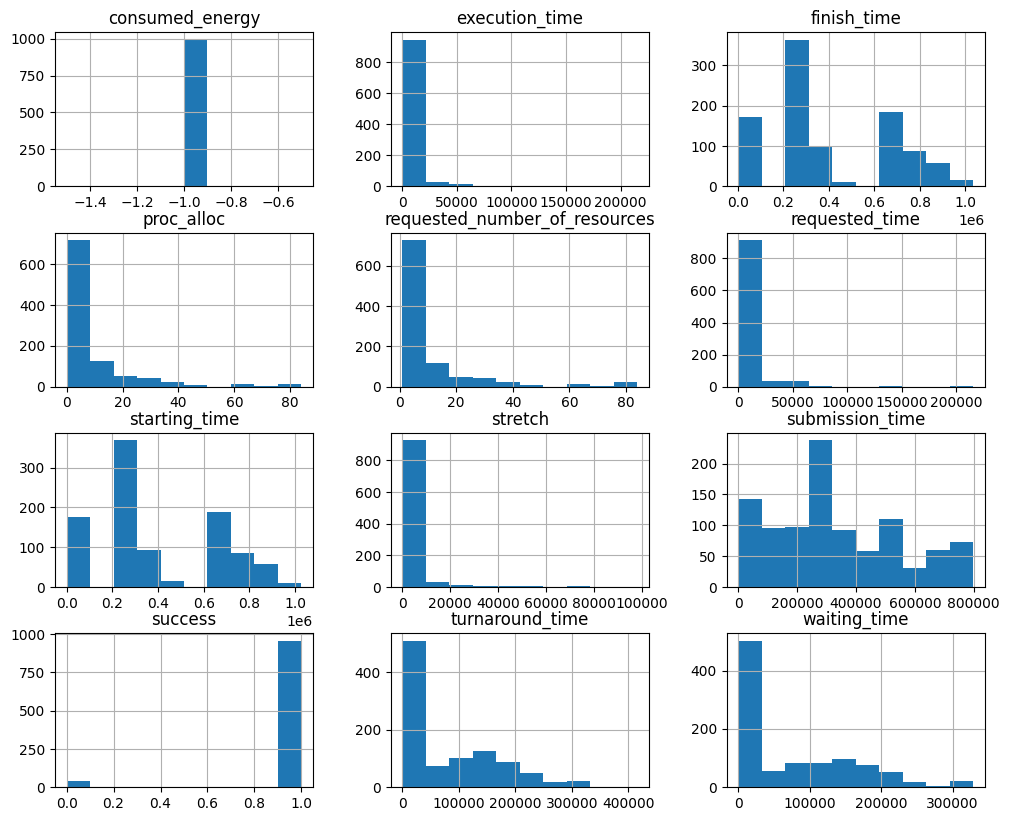

In [97]:
matplotlib.rcParams['figure.dpi']= 100
df = js.df.drop('metadata', axis=1)
df.hist(figsize=(12, 10))

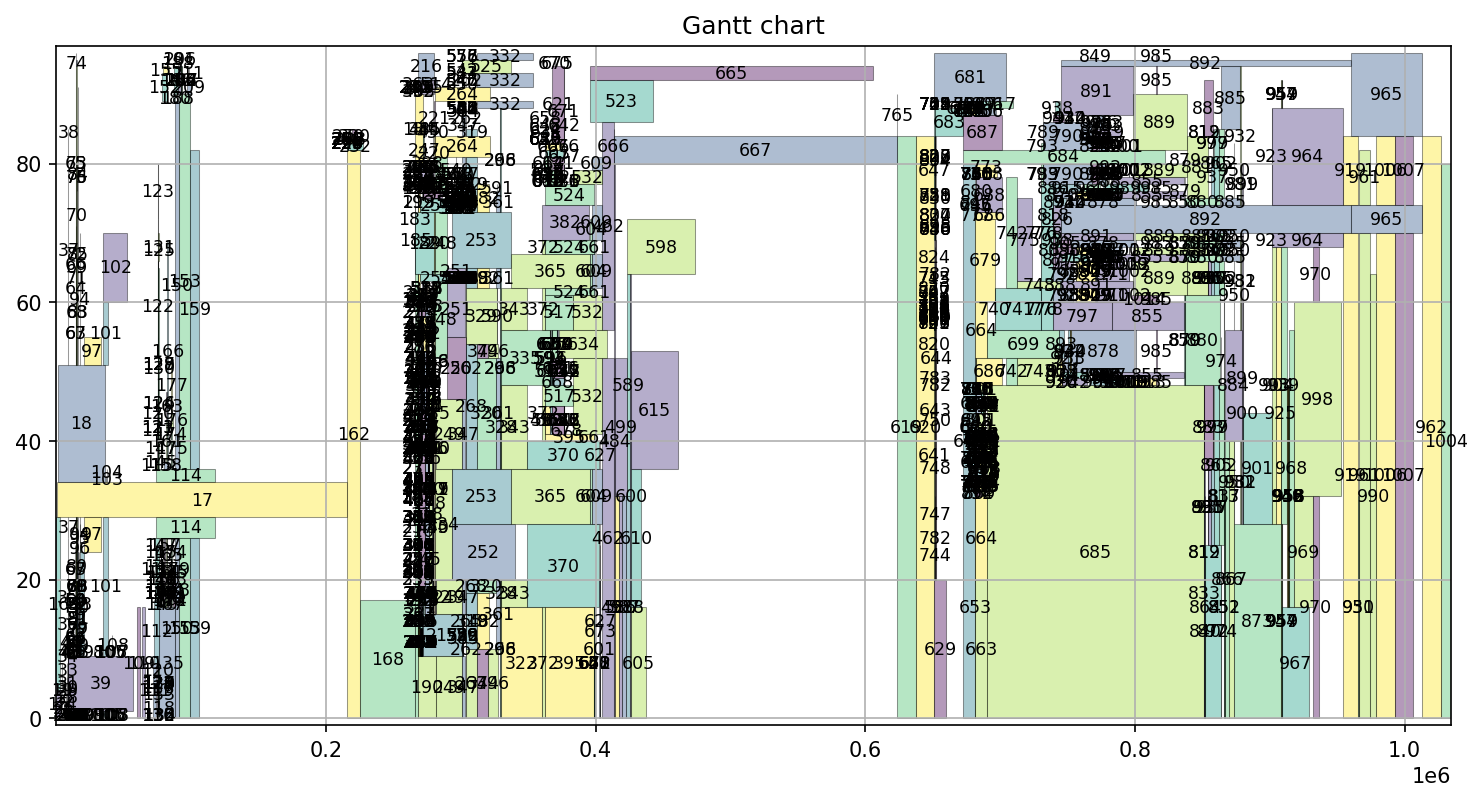

In [98]:
matplotlib.rcParams['figure.figsize'] = 12, 6
matplotlib.rcParams['figure.dpi']= 150
js.gantt()

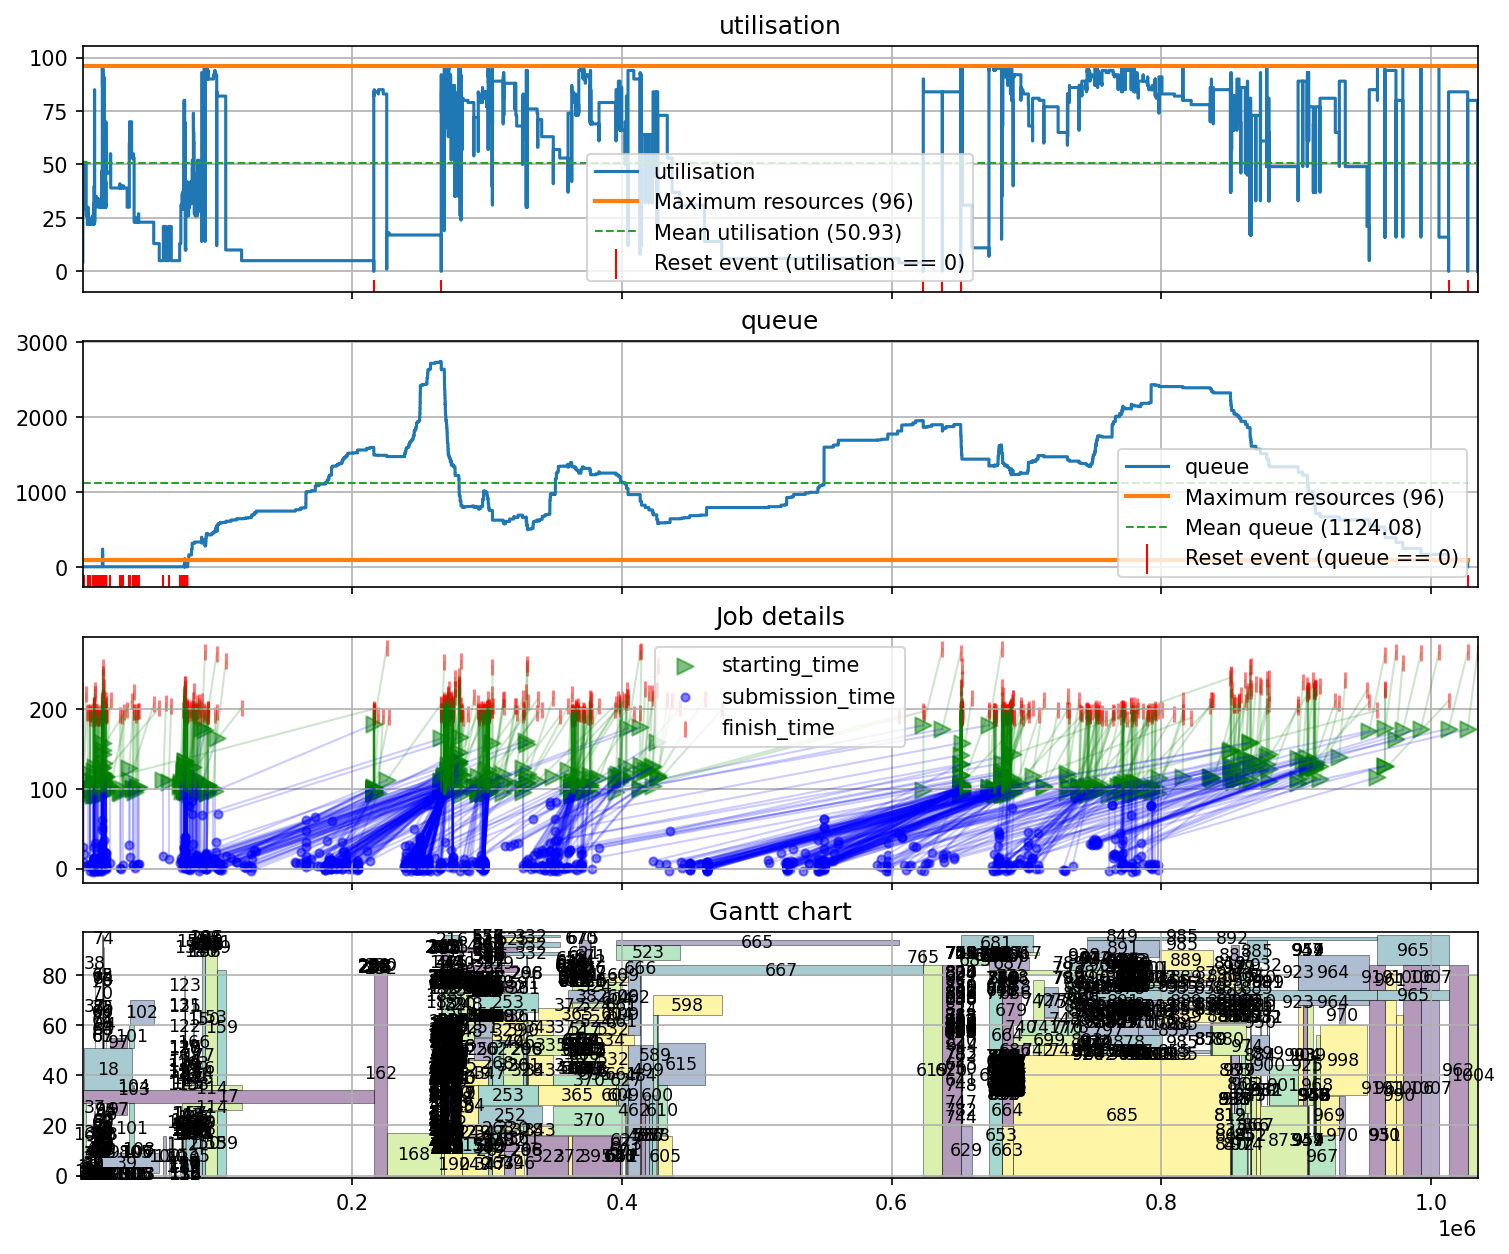

In [99]:
matplotlib.rcParams['figure.figsize'] = 12, 10
matplotlib.rcParams['figure.dpi']= 150
js.plot(with_details=True)